___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# RNN (Time Series)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [4]:
df = pd.read_csv('RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [5]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.columns = ['Sales']

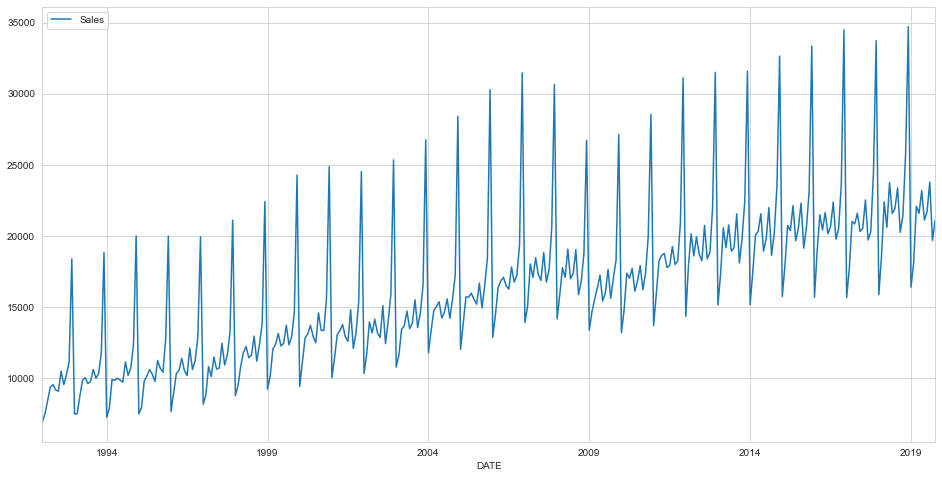

In [9]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [10]:
len(df)

334

In [11]:
test_size = 24

In [14]:
test_ind = len(df)- test_size
test_ind

310

In [15]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [16]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [17]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


### Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# help(TimeseriesGenerator)

In [22]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [23]:
len(generator)

298

In [24]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [25]:
X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


## Modelling

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [28]:
n_features = train_scaled.shape[1]

In [29]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [41]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [43]:
4 * ((100+1)*50+(50**2))

30200

### EarlyStopping and Validation Generator

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [46]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [47]:
len(validation_generator)

12

In [50]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
298/298 [==============================] - 3s 9ms/step - loss: 0.0018 - val_loss: 0.0100
Epoch 2/20
298/298 [==============================] - 3s 10ms/step - loss: 0.0024 - val_loss: 9.7588e-04
Epoch 3/20
298/298 [==============================] - 4s 15ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/20
298/298 [==============================] - 4s 14ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 6/20
298/298 [==============================] - 3s 9ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 7/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0022 - val_loss: 0.0010


<AxesSubplot:>

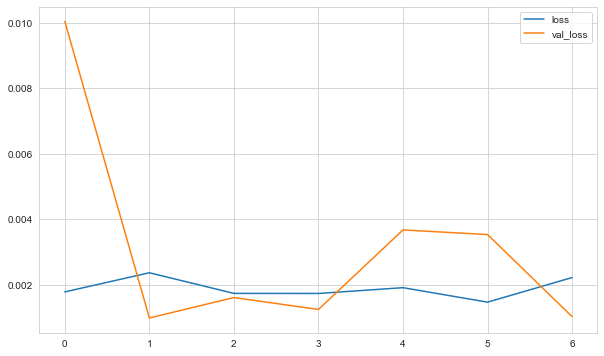

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [55]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [56]:
predictions_scaled

[array([0.6463783], dtype=float32),
 array([0.9829156], dtype=float32),
 array([0.35754824], dtype=float32),
 array([0.4171648], dtype=float32),
 array([0.5026029], dtype=float32),
 array([0.5061189], dtype=float32),
 array([0.5205605], dtype=float32),
 array([0.4831928], dtype=float32),
 array([0.49229807], dtype=float32),
 array([0.50637317], dtype=float32),
 array([0.43329337], dtype=float32),
 array([0.46270782], dtype=float32)]

In [57]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.8755750729817161 
mae: 0.04376572732995701 
mse: 0.0027556917944918783 
rmse: 0.05249468348787216


### Inverse Transformations and Comparing

In [58]:
predictions = scaler.inverse_transform(predictions_scaled)

In [59]:
compare = test[:12]

In [60]:
compare['Predictions'] = predictions

In [61]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,24741.843
2017-12-01,33720,34011.427
2018-01-01,15881,16786.309
2018-02-01,18585,18428.387
2018-03-01,22404,20781.694
2018-04-01,20616,20878.539
2018-05-01,23764,21276.318
2018-06-01,21589,20247.063
2018-07-01,21919,20497.858


<AxesSubplot:xlabel='DATE'>

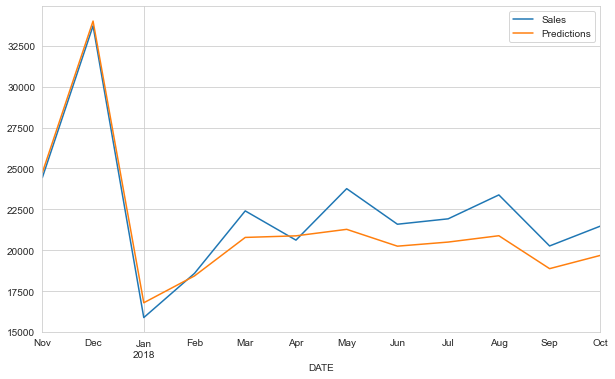

In [62]:
compare.plot()

In [63]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.8755750729817158 
mae: 1205.4831935763375 
mse: 2090666.0287464736 
rmse: 1445.913561989953


## Retrain and Forecasting

In [64]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [65]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [66]:
len(df)

334

In [67]:
len(generator)

322

In [68]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 7s 12ms/step - loss: 0.0226
Epoch 2/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0205
Epoch 3/15
322/322 [==============================] - 3s 9ms/step - loss: 0.0201
Epoch 4/15
322/322 [==============================] - 3s 8ms/step - loss: 0.0193
Epoch 5/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0174
Epoch 6/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0164
Epoch 7/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0155
Epoch 8/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0140
Epoch 9/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0130
Epoch 10/15
322/322 [==============================] - 3s 9ms/step - loss: 0.0114
Epoch 11/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0114
Epoch 12/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0085
Epoch 13/15
322/

In [82]:
scaled_full_data.shape

(334, 1)

In [83]:
scaled_full_data[-length:].shape

(12, 1)

In [71]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [72]:
forecast = scaler.inverse_transform(forecast)

In [73]:
forecast

array([[22454.9573288 ],
       [22969.77411556],
       [18580.8813014 ],
       [19920.87300014],
       [20994.10653734],
       [20989.55232191],
       [21179.66044378],
       [20789.7266798 ],
       [21028.92642021],
       [21135.94063234],
       [20308.75785971],
       [20869.36634684]])

In [74]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [75]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

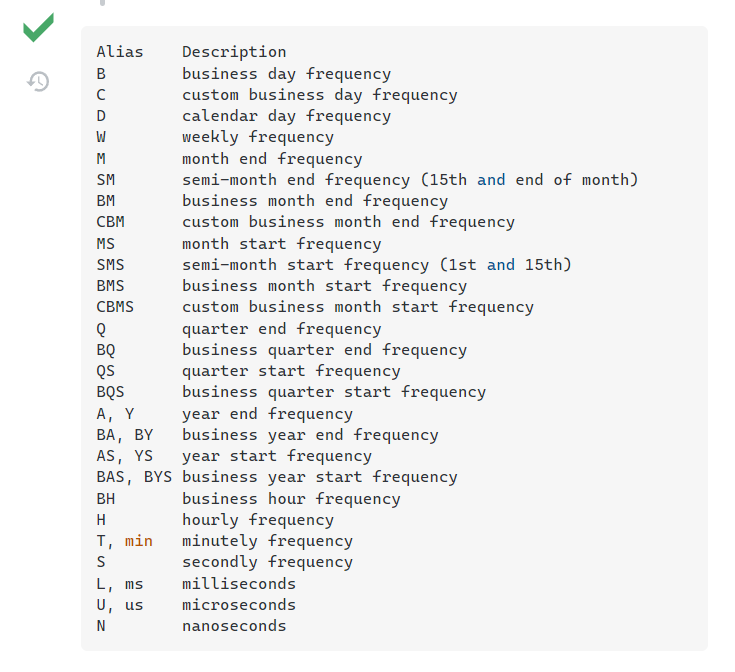

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [76]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [77]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [78]:
forecast_df

,Forecast
2019-11-01,22454.957
2019-12-01,22969.774
2020-01-01,18580.881
2020-02-01,19920.873
2020-03-01,20994.107
2020-04-01,20989.552
2020-05-01,21179.660
2020-06-01,20789.727
2020-07-01,21028.926
2020-08-01,21135.941


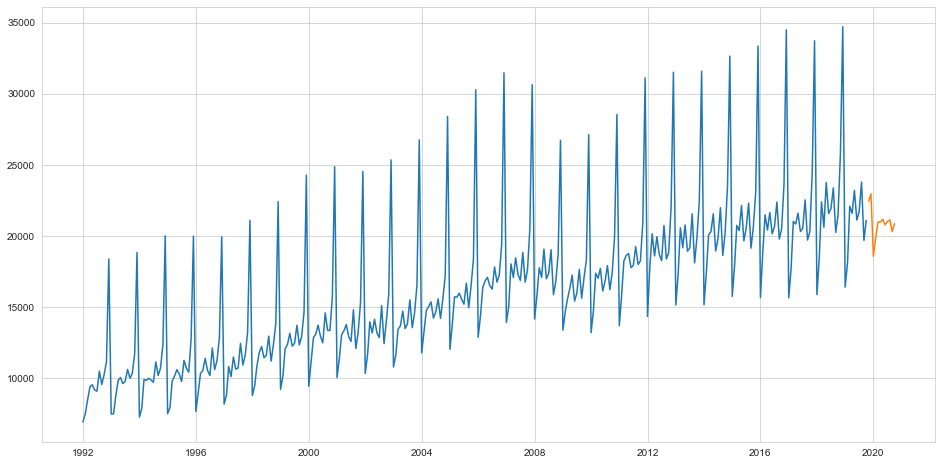

In [79]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [84]:
dataset_total = pd.concat((df['Sales'], forecast_df['Forecast']), axis=0)

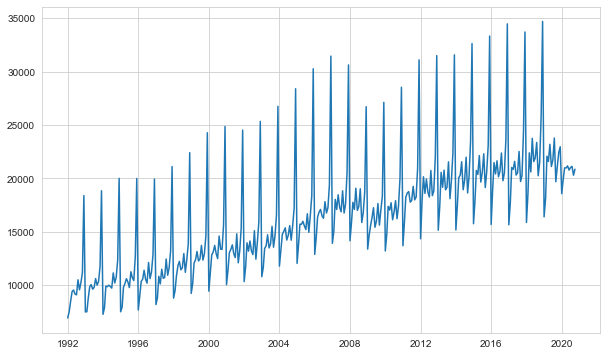

In [85]:
plt.plot(dataset_total)

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

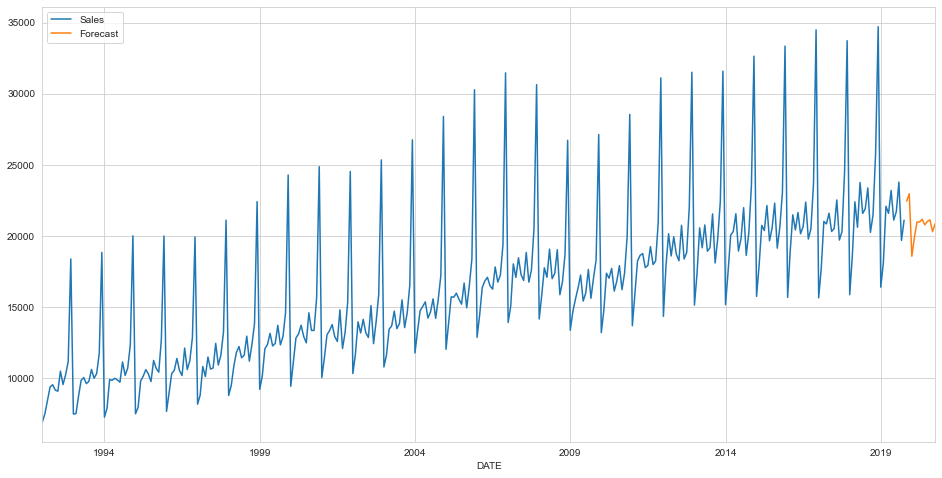

In [80]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

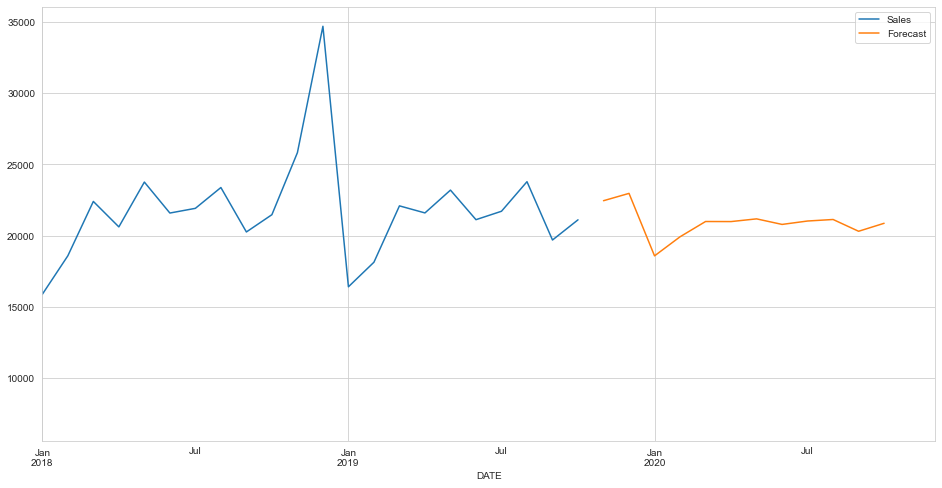

In [81]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___